In [1]:
import sys
sys.path.insert(0, '..')

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from os import listdir
from os.path import join
from train_cvppp import evaluate

import deepcoloring as dc

%matplotlib inline
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In order to run this example you need to download dataset https://www.plant-phenotyping.org/datasets-download

In [2]:
!wget https://www.dropbox.com/s/whwzh9pdbk69o7x/cvppp_model.t7 -O model.t7

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
net = dc.EUnet(3, 9, 4, 3, 1, depth=3, padding=1, init_xavier=True, use_bn=False, use_dropout=True).to(device)
net.load_state_dict(torch.load("cvppp_model.t7",  map_location='cpu'))
net.eval()
print("Model loaded")

Model loaded


[[[114 115 117 255]
  [121 118 114 255]
  [115 113 110 255]
  ...
  [123 114 117 255]
  [128 123 128 255]
  [111 126 129 255]]

 [[125 113 113 255]
  [121 117 107 255]
  [111 116 113 255]
  ...
  [136 118 126 255]
  [129 124 132 255]
  [121 125 129 255]]

 [[115 112 104 255]
  [129 130 119 255]
  [128 119 119 255]
  ...
  [120 119 122 255]
  [126 123 137 255]
  [133 123 141 255]]

 ...

 [[ 90  79  71 255]
  [ 87  83  72 255]
  [ 90 102  86 255]
  ...
  [220 117  71 255]
  [215 120  87 255]
  [218 118  79 255]]

 [[ 81  58  58 255]
  [ 82  77  67 255]
  [102  84  60 255]
  ...
  [223 124  80 255]
  [220 110  76 255]
  [215 116  77 255]]

 [[ 58  26  33 255]
  [ 75  61  54 255]
  [ 91  69  48 255]
  ...
  [222 132  99 255]
  [227 125  91 255]
  [215 116  73 255]]]


(<Figure size 1440x720 with 2 Axes>, <Figure size 1440x720 with 9 Axes>)

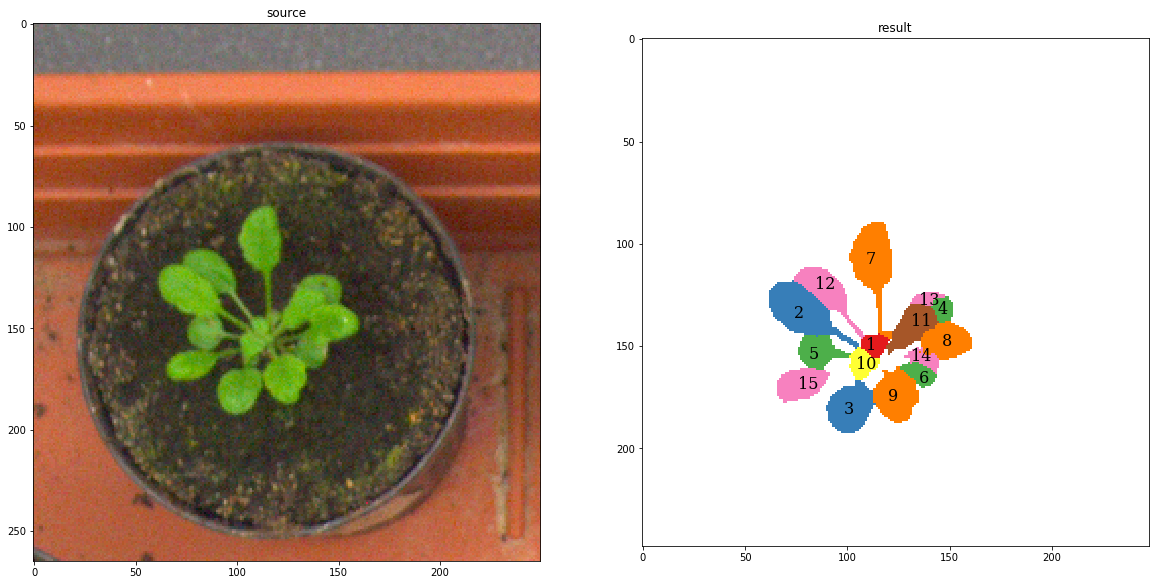

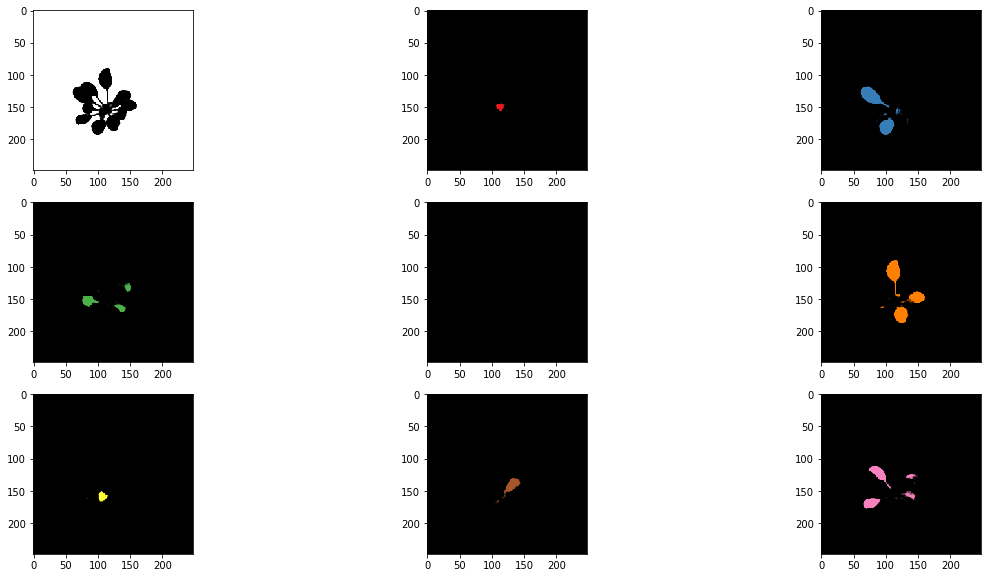

In [3]:
from skimage.io import imread
xo = imread("../images/plant001_rgb.png")[::2,::2]
print(xo)

x = dc.rgba2rgb()(xo, True)/255.
x = dc.normalize(0.5, 0.5, )(x, True)
x = x.transpose(2, 0, 1)[:, :248, :248]

vx = torch.from_numpy(np.expand_dims(x, 0)).to(device)
p = net(vx)
p_numpy = p.detach().cpu().numpy()[0]
dc.visualize(xo[:,:,:3],p_numpy,65)